In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#dataset = pd.concat((train, test), axis=0)

#train_len = len(train)

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [6]:
# Check for duplicates in dataset
ds = len(set(train['Id']))
total = train.shape[0]
dup = total - ds
dup

0

In [7]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test_id = test['Id']
test.drop("Id", axis = 1, inplace = True)

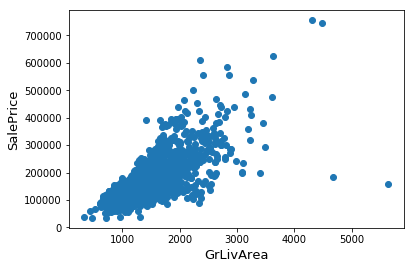

In [8]:
# Explore outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

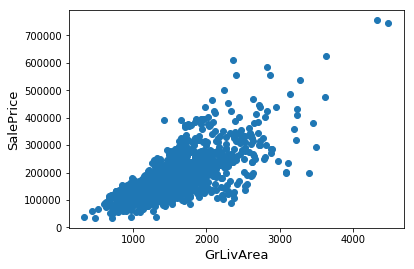

In [9]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#dataset = dataset.drop(dataset[(dataset['GrLivArea']>4000) & (dataset['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



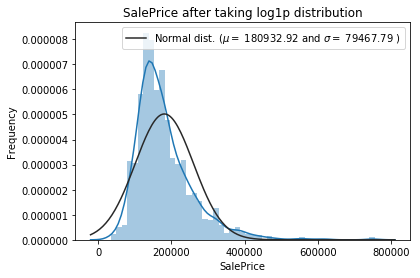

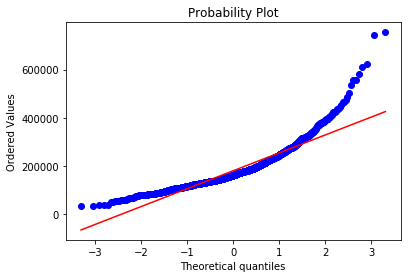

In [10]:
from scipy import stats
from scipy.stats import norm, skew



sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice after taking log1p distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [11]:
#dataset['SalePrice'] = np.log1p(dataset['SalePrice'])
#dataset['SalePrice'].head()
train['SalePrice'] = np.log1p(train['SalePrice'])
train['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [12]:
ntrain = train.shape[0]
ntest = test.shape[0]
y = train['SalePrice']
#y_train = train.SalePrice.values
dataset = pd.concat((train, test)).reset_index(drop=True)
dataset.drop(['SalePrice'], axis=1, inplace=True)
print("dataset size is : {}".format(dataset.shape))

dataset size is : (2917, 79)


In [13]:
corr = train.corr()
#plt.subplots(figsize=(20,15))
#sns.heatmap(corr, annot = True, fmt='.2f', cmap='Greens')

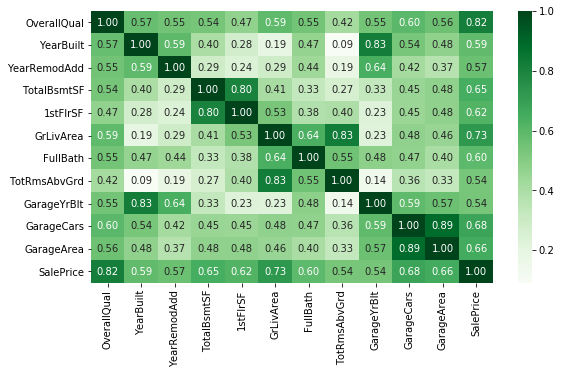

In [14]:
large_corr = corr.index[abs(corr['SalePrice']) > 0.5]
small_corr = corr.index[abs(corr['SalePrice']) <= 0.5]
plt.subplots(figsize=(9, 5))
sns.heatmap(train[large_corr].corr(), annot = True, fmt='.2f', cmap='Greens')

In [15]:
# Missing values
missing = dataset.isnull().sum()
missing = missing.drop(missing[missing==0].index)
missing

Alley           2719
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2346
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2812
PoolQC          2908
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [16]:
#PoolQC : NA means "No Pool"
#dataset['PoolQC'].describe(include=['0'])
#dataset['PoolQC'].head()
dataset['PoolQC'] = dataset['PoolQC'].fillna('NoPool')
dataset['PoolQC'].describe(include=['0'])

count       2917
unique         4
top       NoPool
freq        2908
Name: PoolQC, dtype: object

In [17]:
#MiscFeature : NA means "no misc feature"
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('NoMiscFeature')
dataset['MiscFeature'].describe(include=['0'])

count              2917
unique                5
top       NoMiscFeature
freq               2812
Name: MiscFeature, dtype: object

In [18]:
dataset['Alley'] = dataset['Alley'].fillna('NoAlleyAccess') #Alley : NA means "no alley access"
dataset['Fence'] = dataset['Fence'].fillna('NoFence') #Fence : NA means "no fence"
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NoFireplace') #FireplaceQu : NA means "no fireplace"
dataset['Fence'].describe(include=['0'])

count        2917
unique          5
top       NoFence
freq         2346
Name: Fence, dtype: object

In [19]:
# LotFrontage: Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#dataset["LotFrontage"] = dataset["LotFrontage"].groupby("Neighborhood").transform(lambda x: x.fillna(x.median()))

In [20]:
# 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond': replace missing data with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dataset[col] = dataset[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col] = dataset[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col] = dataset[col].fillna(0)
    
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
# For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')

# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. 
dataset["MasVnrType"] = dataset["MasVnrType"].fillna("None")
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(0)

# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])

# Utilities : replace missing data with 'None'
dataset['Utilities'] = dataset['Utilities'].fillna('None')

# Functional : data description says NA means typical
dataset['Functional'] = dataset['Functional'].fillna('Typical')

# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class. We can replace missing values with None
dataset['MSSubClass'] = dataset['MSSubClass'].fillna('None')

In [21]:
# Missing values
missing = dataset.isnull().sum()
missing = missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [22]:
#plt.subplots(figsize=(9,5))
#sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap='YlGnBu_r')

In [23]:
# Transforming some numerical variables that are really categorical
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str) #MSSubClass=The building class
dataset['OverallCond'] = dataset['OverallCond'].apply(str) 
dataset['YrSold'] = dataset['YrSold'].apply(str)
dataset['MoSold'] = dataset['MoSold'].apply(str)
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].apply(str)
dataset['YearBuilt'] = dataset['YearBuilt'].apply(str)
dataset['YearRemodAdd'] = dataset['YearRemodAdd'].apply(str)
#dataset.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass        object
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64


In [24]:
# Categorical and Numerical features
categorical_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(exclude=['object']).columns
print(categorical_features)
print('-'*40)
print(numerical_features)
#dataset.dtypes

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive',
       'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')
----------------------------------------
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'Gar

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass        object
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64


In [25]:
#dataset['YearRemodAdd'].head()


In [26]:
dataset.shape

(2917, 79)

In [27]:
#dataset['BsmtFinType2'].head(30)

In [28]:
# Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond' 
        )
#'YrSold', 'MoSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dataset[c].values)) 
    dataset[c] = lbl.transform(list(dataset[c].values))

# shape        
print('Shape dataset: {}'.format(dataset.shape))
#dataset.dtypes
dataset['YearBuilt'].head()

Shape dataset: (2917, 79)


0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: object

In [29]:
# Adding total sqfootage feature 
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']

In [30]:
# 'OverallQual' v.s. 'SalePrice'
train[['OverallQual','SalePrice']].groupby(['OverallQual'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,OverallQual,SalePrice
9,10,13.029615
8,9,12.793271
7,8,12.497195
6,7,12.221778
5,6,11.967315
4,5,11.780665
3,4,11.557158
2,3,11.337487
1,2,10.825404
0,1,10.798825


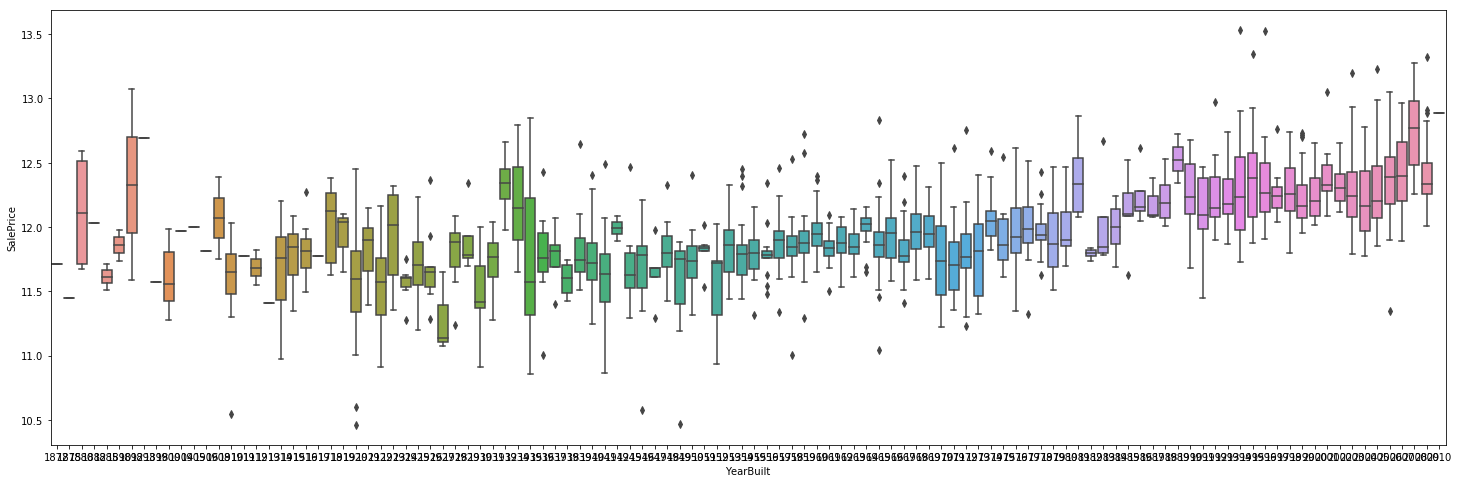

In [31]:
# 'YearBuilt' v.s. 'SalePrice'
#train[['YearBuilt','SalePrice']].groupby(['YearBuilt'],as_index=False).mean().sort_values(by='YearBuilt')
plt.subplots(figsize=(25,8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=train)

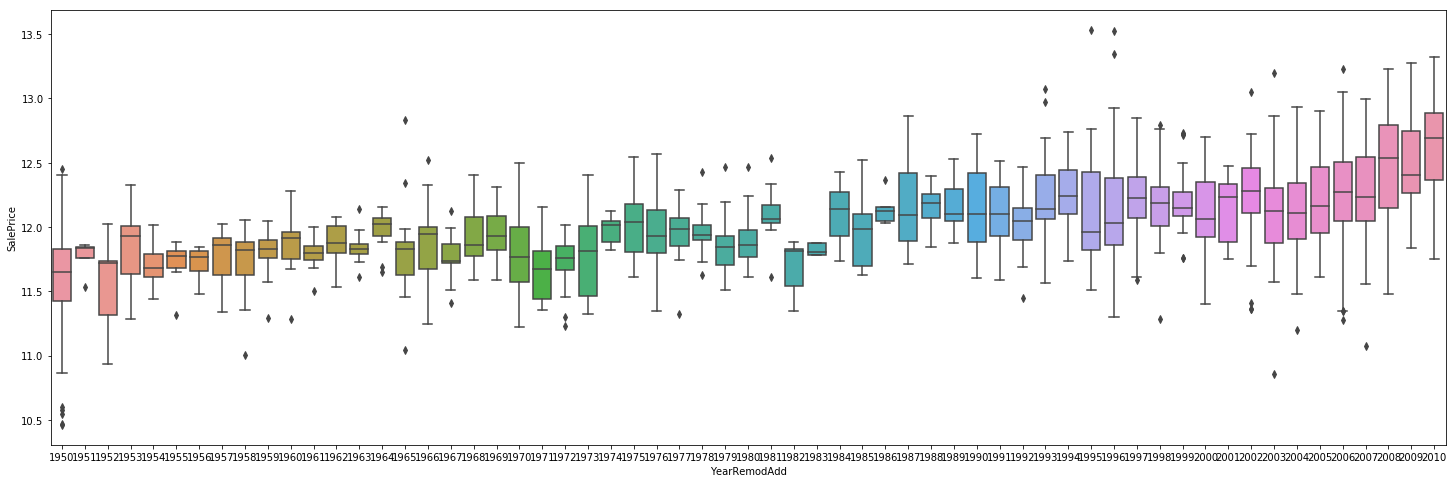

In [32]:
# 'YearRemodAdd' v.s. 'SalePrice'
plt.subplots(figsize=(25,8))
sns.boxplot(x='YearRemodAdd', y='SalePrice', data=train)

In [33]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt','1stFlrSF', 'TotRmsAbvGrd']
#sns.pairplot(train[cols], size = 2.5)
#plt.show()

In [34]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew()) 
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.121580
Kurtosis: 0.804751


In [35]:
dataset.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley              int64
BedroomAbvGr       int64
BldgType          object
BsmtCond           int64
BsmtExposure       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1       int64
BsmtFinType2       int64
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual           int64
BsmtUnfSF        float64
CentralAir         int64
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond          int64
ExterQual          int64
Exterior1st       object
Exterior2nd       object
Fence              int64
FireplaceQu        int64
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotShape           int64
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64
MoSold            object


In [36]:
numerical_features = dataset.dtypes[dataset.dtypes != "object"].index
numerical_features

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GrLivArea',
       'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandSlope',
       'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC', 'ScreenPorch', 'Street',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'TotalSF'],
      dtype='object')

In [37]:
skewness = dataset[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#skewness
skewness = pd.DataFrame({'Skew' :skewness})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [38]:
#kurtosis = dataset.apply(lambda x: kurtosis(x))
#kurtosis.sort_values(ascending=False)

In [39]:
#dataset[numerical_features][skewness_large.index].head()
#skewness_large.head()
#dataset[skewness.index].head()
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 54 skewed numerical features to Box Cox transform


In [40]:
#dataset[skewness.index] = np.log1p(dataset[skewness.index])

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    dataset[feat] = boxcox1p(dataset[feat], lam)

dataset[skewness.index].head()

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,...,ExterCond,BsmtCond,PavedDrive,BsmtFinType2,GarageQual,CentralAir,GarageCond,Functional,Street,PoolQC
0,0.0,0.0,19.212182,0.0,0.0,0.0,0.730463,0.0,0.000000,0.0,...,1.820334,1.820334,1.194318,2.259674,2.055642,0.730463,2.055642,2.259674,0.730463,1.540963
1,0.0,0.0,19.712205,0.0,0.0,0.0,0.730463,0.0,0.000000,0.0,...,1.820334,1.820334,1.194318,2.259674,2.055642,0.730463,2.055642,2.259674,0.730463,1.540963
2,0.0,0.0,20.347241,0.0,0.0,0.0,0.730463,0.0,0.000000,0.0,...,1.820334,1.820334,1.194318,2.259674,2.055642,0.730463,2.055642,2.259674,0.730463,1.540963
3,0.0,0.0,19.691553,0.0,0.0,0.0,0.730463,0.0,8.797736,0.0,...,1.820334,0.730463,1.194318,2.259674,2.055642,0.730463,2.055642,2.259674,0.730463,1.540963
4,0.0,0.0,21.325160,0.0,0.0,0.0,0.730463,0.0,0.000000,0.0,...,1.820334,1.820334,1.194318,2.259674,2.055642,0.730463,2.055642,2.259674,0.730463,1.540963


In [41]:
# Get dummy categorical features
dataset = pd.get_dummies(dataset)
#dataset.shape
dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,1.194318,...,0,0,0,0,0,0,0,1,0,0
1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,1.194318,...,0,0,0,0,0,0,0,1,0,0
3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,0.000000,...,0,0,0,0,0,1,0,0,0,0
4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,1.194318,...,0,0,0,0,0,0,0,1,0,0


# Drop small_corr features
dataset.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)
#,'MoSold', 'YrSold'
dataset.shape

# Pick important features only
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
dataset = dataset[cols]
dataset.head()

In [42]:
# Model Building
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor

In [43]:
train = dataset[:ntrain]
test = dataset[ntrain:]

#x = train.drop(['SalePrice'],axis=1)
#y = train['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(train,y,test_size=0.3,random_state=1)

x_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1393,12.480332,12.987689,0.0,0.730463,1.820334,0.730463,0.730463,0.000000,0.000000,2.259674,...,1,0,0,0,0,0,1,0,0,0
531,11.598065,0.000000,0.0,0.730463,1.194318,1.194318,1.820334,0.000000,0.000000,1.820334,...,0,1,0,0,0,0,0,0,0,1
1040,11.507463,11.614567,0.0,0.730463,1.820334,1.820334,1.540963,9.715842,5.802739,1.194318,...,0,0,0,0,0,0,0,1,0,0
1323,11.493820,0.000000,0.0,0.730463,1.194318,0.000000,1.540963,0.000000,0.000000,2.259674,...,0,0,0,0,0,0,0,1,0,0
863,13.037557,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,0.000000,0.000000,2.259674,...,0,0,1,0,0,0,0,1,0,0


In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
#import xgboost as xgb
import lightgbm as lgb

clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge(),
        'LinearRegression':LinearRegression(),
        'Lasso':Lasso(alpha =0.0005, random_state=1),
        'ElasticNet':ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3),
        'KRR':KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
        'GBoost':GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5),
        'lgb':lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

       }
for clf in clfs:
    try:
        clfs[clf].fit(x_train, y_train)
        y_pred = clfs[clf].predict(x_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

'''
svm cost:0.01643796936781078
RandomForestRegressor cost:0.01400974658990536
BayesianRidge cost:0.009243809203315323
LinearRegression cost:0.008835194682622824
'''

svm cost:0.006499733013127851
RandomForestRegressor cost:0.0014843650326754477
BayesianRidge cost:0.0013386120460875228
LinearRegression cost:-11984334.810993481
Lasso cost:-0.00020070673482382433
ElasticNet cost:-4.064337858621263e-05
KRR cost:0.0024897986058677155
GBoost cost:0.005646717332716232
lgb cost:0.003525108213651541


'\nsvm cost:0.01643796936781078\nRandomForestRegressor cost:0.01400974658990536\nBayesianRidge cost:0.009243809203315323\nLinearRegression cost:0.008835194682622824\n'

In [88]:
#clf = linear_model.BayesianRidge()
model_1 = Lasso(alpha =0.0005, random_state=1)
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)

# Cross-Validation (CV)
# Apply K-Fold Cross Validation
accuracies = cross_val_score(estimator=model_1,X= x_train,y=y_train,cv=10)
accuracies.mean() #Prints out the 10 different Cross Validation scores.

0.9229677272418557

In [77]:
#clf = linear_model.BayesianRidge()
model_2 = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.04, n_estimators=800,
                              max_bin = 63, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)

# Cross-Validation (CV)
# Apply K-Fold Cross Validation
accuracies = cross_val_score(estimator=model_2,X= x_train,y=y_train,cv=10)
accuracies.mean() #Prints out the 10 different Cross Validation scores.

0.9172394817170874

In [52]:
#accuracies.mean()

#0.9226243580931722 -Lasso
#0.8815634558227898 -svm /Drop small_corr features
#0.83873923918235   -RandomForestRegressor(n_estimators=400) /Pick important features only

In [90]:
#Y_pred = (np.exp(model_1.predict(test)) + np.exp(model_2.predict(test))) / 2
Y_pred = np.exp(model_1.predict(test))
Y_pred.shape

(1459,)

In [91]:
submission = pd.DataFrame({
        "Id":test_id,
        "SalePrice": Y_pred
    })
submission.to_csv('submission.csv', index=False)

# Results: 0.12405 -Lasso() /all feaures
# Results: 0.12268 -Lasso() + GradientBoostingRegressor /all feaures
# Results: 9.45426 -RandomForestRegressor(n_estimators=400) /Drop small_corr features
# Results: 9.45404 -RandomForestRegressor(n_estimators=400) /Pick important features only